Nguyen Trong Minh 22BI13304

#### Exercise 1

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df1 = pd.read_csv("Data_EX1.txt", header=None)
df1 = df1.drop(df1.columns[0], axis=1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,15.0,18.0,17.5,18.5,22.9,27.0,26.0,26.8,26.5,23.6,23.6,16.8
1,14.3,17.6,16.9,19.1,22.0,28.3,27.5,26.4,24.3,24.3,21.3,18.5
2,13.2,18.1,18.5,20.5,21.8,25.4,26.5,28.1,25.9,23.9,20.0,16.9
3,15.4,19.8,20.9,21.8,21.5,25.8,26.1,27.3,25.6,24.1,18.2,18.4
4,18.0,17.5,16.1,18.9,22.7,25.6,25.2,28.1,26.6,24.1,15.9,15.2


In [3]:
for i in range(1,13):
    df1[i] = pd.to_numeric(df1[i], errors='coerce')
    df1[i] = df1[i].replace(30.0, np.nan)
    
days_ = df1.T.values.flatten().tolist()
days = [num for num in days_ if num != -99.0]
for i in range(1,13):
    df1[i] = df1[i].replace(-99.0, np.nan)

In [4]:
len(days)

365

In [19]:
time_range = range(df1.shape[1])
months = ["01\nJan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec","31\nDec"]

# mean of each month
month_mean = [np.nanmean(df1[x].to_numpy()) for x in range(1,13)]
# text position
text_y = [x + 3 for x in month_mean]
text_y[5] -= 1
# range of each month
month_min = [np.nanmin(df1[x]) for x in range(1,13)]
month_max = [np.nanmax(df1[x]) for x in range(1,13)]



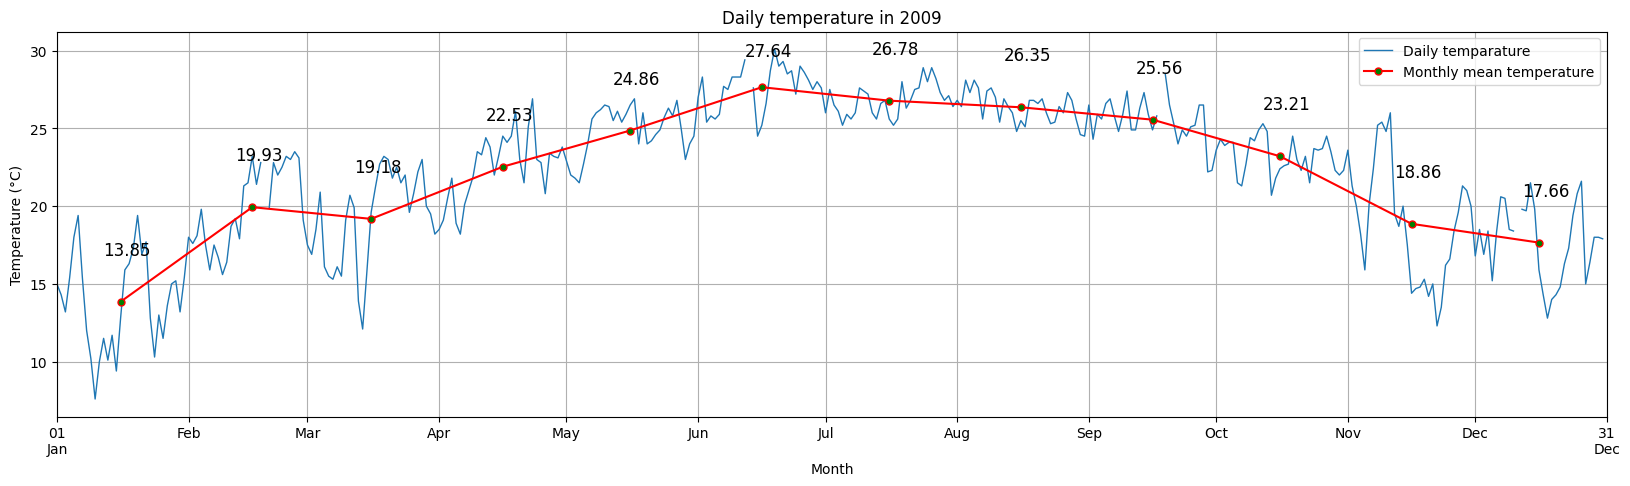

In [20]:
# plot
plt.figure(figsize=(20,5))

day_range = range(365)
month__ = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
month_ = [x + 15 for x in month__[:-1]]
plt.plot(day_range, days, linewidth=1, label='Daily temparature')
#middle line
plt.plot(month_,month_mean, marker='.', markersize=10,markerfacecolor='green', linestyle='solid', color="red", label="Monthly mean temperature")
# plt.scatter(time_range, month_mean, color='green', label='dots', zorder=3)

# Add text labels next to the points
for i in range(len(time_range)):
    plt.text(month_[i] - 4, text_y[i], str(np.round(month_mean[i],2)), fontsize=12)


# other 
plt.legend()
plt.xticks(month__, months)
plt.xlim(0,365)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Daily temperature in 2009")
plt.grid()

#### Exercise 2

Text(0.5, 1.0, 'Daily Temperature Heatmap in 2009')

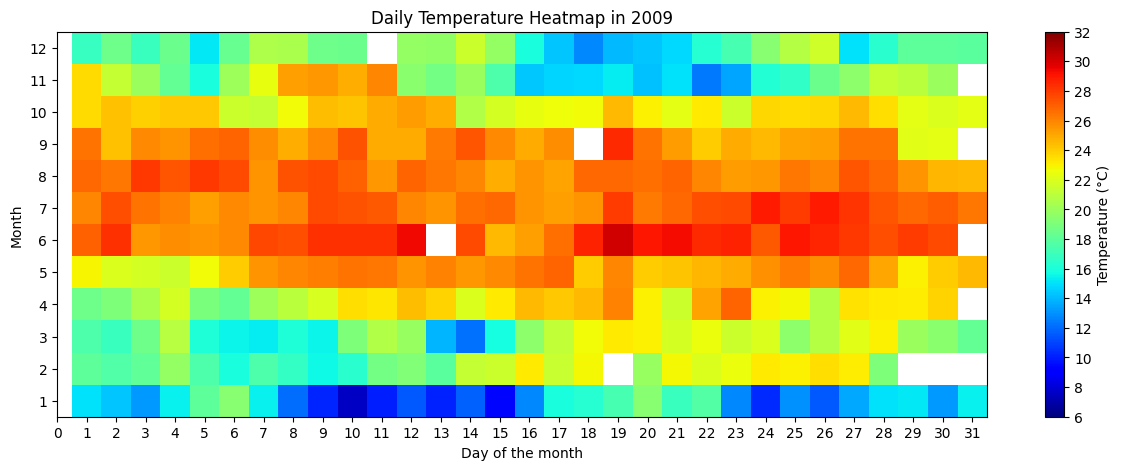

In [23]:
x_axis = np.arange(1,32,1)
y_axis = np.arange(1,13,1)
data = df1.T
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

plt.figure(figsize=(15,5))
cm = plt.pcolormesh(x_axis, y_axis, data, cmap = 'jet', vmin=6, vmax=32)      #this is the pcolormesh

plt.xticks(range(32),range(32))
plt.yticks(range(12,0,-1))

cbar = plt.colorbar(cm)
cbar.set_label('Temperature (°C)')
cbar.set_ticks(range(6,33,2))  # Positions of ticks
cbar.set_ticklabels(range(6,33,2))

plt.ylabel("Month")
plt.xlabel("Day of the month")
plt.title("Daily Temperature Heatmap in 2009")

#### Exercise 3

<Figure size 1500x500 with 0 Axes>

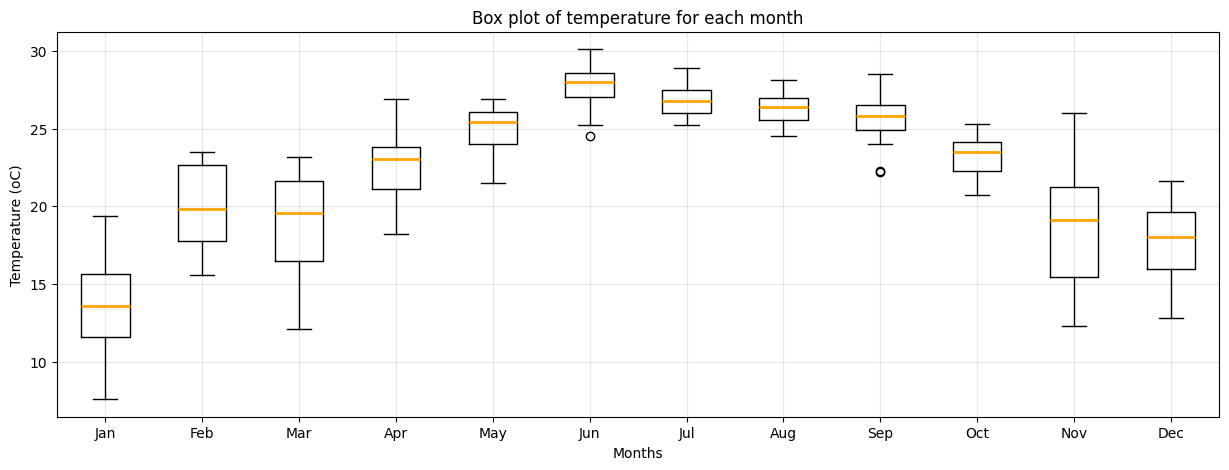

In [25]:
plt.figure(figsize=(15,5))
box = df1.plot(kind='box', figsize=(15,5), color='black', medianprops=dict(color='orange', linewidth=2))
# plt.hlines(y=np.mean(month_mean), xmin=1, xmax=12, color='blue', linestyle='--', linewidth=2)
# plt.text(6, np.mean(month_mean) + 1, f"Mean = {np.round(np.mean(month_mean),1)}", fontsize=12, color='blue')
plt.xticks(list(range(1,13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Box plot of temperature for each month")
plt.ylabel("Temperature (oC)")
plt.xlabel("Months")
plt.grid(alpha=0.3,zorder=0)
plt.show()

#### Exercise 4

In [35]:
import xarray as xr
from numpy import *
from netCDF4 import *
from datetime import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm
import geopandas as gpd
import matplotlib.patheffects as pe

ModuleNotFoundError: No module named 'netCDF4'

In [36]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.7 MB/s eta 0:00:001.8 MB/s eta 0:00:01


In [32]:
random.seed(180793)
x_location , y_location = [], []
for _ in range(2000):
    x_location.append(random.randint(10650, 10800))
    y_location.append(random.randint(2060, 2170))

In [ ]:
netcdf_file = 'wrfout_d02_2019-11-12_sample.nc'
xr_data = xr.open_dataset(netcdf_file)
lon = xr_data.coords["XLONG"].values
lat = xr_data.coords["XLAT"].values
data = xr_data.data_vars["T2"].values

gadm_shapefile_path = '../../data_visualization_labwork/gadm41_VNM_0/gadm41_VNM_1.shp'
gadm_data = gpd.read_file(gadm_shapefile_path)
hanoi = gadm_data[gadm_data['NAME_1'] == 'Hà Nội']